In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import re
import copy

import numpy as np 

from astropy.io import fits
from astropy.stats import sigma_clip
from astropy.table import Table, Column

import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=False)

In [2]:
from caterpillar import qaplot
from caterpillar import visual

In [3]:
data_dir = '/Users/song/work/merian/raw/'

In [4]:
!ls /Users/song/work/merian/raw/

c4d_210225_185128_fri.fits.fz	       c4d_210306_001742_ori.fits.fz
c4d_210227_022058_ooi_N708_v1.fits.fz  c4d_210306_044400_ori.fits.fz
c4d_210227_023128_ooi_N708_v1.fits.fz  object_stacked


In [5]:
#exp_file = os.path.join(data_dir, 'c4d_210225_185128_fri.fits.fz')
#exp_file = os.path.join(data_dir, 'c4d_210306_044400_ori.fits.fz')
exp_file = os.path.join(data_dir, 'c4d_210227_022058_ooi_N708_v1.fits.fz')

In [205]:
qaplot.visual_exposure_ccds(
    exp_file, fig_dir='/Users/song/Downloads/', dpi=100, contrast=0.9, 
    cmap='coolwarm')

In [202]:
exp_file = os.path.join(data_dir, 'c4d_210227_022058_ooi_N708_v1.fits.fz')
fits.open(exp_file)[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                   16 / Bits per pixel                                 
NAXIS   =                    0 / Number of axes                                 
EXTEND  =                    T / File may contain extensions                    
DATE    = '2021-03-03T02:33:02' / Date FITS file was generated                  
IRAF-TLM= '2021-03-03T02:34:34' / Time of last modification                     
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
COMMENT MODIFIED:DATE,DATE-OBS,DTACQNAM,DTCALDAT,DTINSTRU,DTNSANAM,DTPI,DTPROPID
COMMENT ,DTSITE,DTTELESC,INSTRUME,OBSERVAT,OBSID,OBSTYPE,ODATEOBS,PROCTYPE,PRODT
COMMENT YPE,PROPID,SIMPLE,TELESCOP,TIME-OBS                                     
OBJECT  = 'G09     '        

In [203]:
fits.open(exp_file)[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 2046 / Axis length                                    
NAXIS2  =                 4094 / Axis length                                    
PCOUNT  =                    0 / No 'random' parameters                         
GCOUNT  =                    1 / Only one group                                 
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
EXTNAME = 'S29     '           / Extension name                                 
IRAF-TLM= '2021-03-03T02:33:36' / Time of last modification                     
INHERIT =                    T / Inherits global header                         
DATE    = '2021-03-03T02:33:03' / Date FITS file was generated                  
WCSAXES =                   

#### Stacked image

In [6]:
data_dir = '/Users/song/work/merian/raw/object_stacked/'

In [7]:
!ls /Users/song/work/merian/raw/object_stacked/ 

c4d_210227_021029_osd_N708_v1.fits.fz  c4d_210227_021029_osi_N708_v1.fits.fz
c4d_210227_021029_ose_N708_v1.fits.fz  c4d_210227_021029_osj_N708_v1.fits.fz


In [ ]:
qaplot.visual_exposure(
    os.path.join(data_dir, 'c4d_210227_021029_ose_N708_v1.fits.fz'),
    fig_dir='/Users/song/Downloads/',
    dpi=100, contrast=0.8, cmap='coolwarm' 
)

In [11]:
exp_file = os.path.join(data_dir, 'c4d_210227_021029_osj_N708_v1.fits.fz')
fits.open(exp_file)[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                   16 / Bits per pixel                                 
NAXIS   =                    0 / Number of axes                                 
EXTEND  =                    T / File may contain extensions                    
DATE    = '2021-03-03T02:23:48' / Date FITS file was generated                  
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
COMMENT MODIFIED:DATE,DATE-OBS,DTACQNAM,DTCALDAT,DTINSTRU,DTNSANAM,DTPI,DTPROPID
COMMENT ,DTSITE,DTTELESC,INSTRUME,OBSERVAT,OBSID,OBSTYPE,PROCTYPE,PRODTYPE,PROPI
COMMENT D,SIMPLE,TELESCOP,TIME-OBS                                              
IRAF-TLM= '2021-03-03T02:23:48' / Time of last modification                     
OBJECT  = 'G09     '        

In [11]:
fits.open(exp_file)[2].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                12191 / Axis length                                    
NAXIS2  =                 9119 / Axis length                                    
PCOUNT  =                    0 / No 'random' parameters                         
GCOUNT  =                    1 / Only one group                                 
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
EXTNAME = 'tile21  '           / Extension name                                 
FZQVALUE=                    4                                                  
FZQMETHD= 'SUBTRACTIVE_DITHER_1'                                                
INHERIT =                    T / Inherits global header                         
DATE    = '2021-03-03T02:24:

In [210]:
len(exp_file)

80

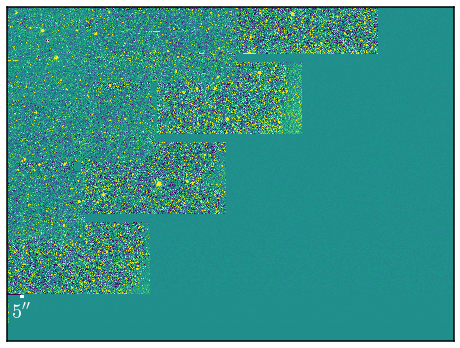

In [17]:
exp_file = os.path.join(data_dir, 'c4d_210227_021029_osj_N708_v1.fits.fz')
_ = visual.display_single(fits.open(exp_file)[3].data)

In [21]:
exp_file = os.path.join(data_dir, 'c4d_210227_021029_osd_N708_v1.fits.fz')
fits.open(exp_file)[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                   16 / Bits per pixel                                 
NAXIS   =                    0 / Number of axes                                 
EXTEND  =                    T / File may contain extensions                    
DATE    = '2021-03-03T02:23:56' / Date FITS file was generated                  
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
COMMENT MODIFIED:DATE,DATE-OBS,DTACQNAM,DTCALDAT,DTINSTRU,DTNSANAM,DTPI,DTPROPID
COMMENT ,DTSITE,DTTELESC,INSTRUME,OBSERVAT,OBSID,OBSTYPE,PROCTYPE,PRODTYPE,PROPI
COMMENT D,SIMPLE,TELESCOP,TIME-OBS                                              
IRAF-TLM= '2021-03-03T02:23:56' / Time of last modification                     
OBJECT  = 'G09     '        